In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")
df.head()


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [3]:
df.shape

(9550, 5)

In [4]:
df.size

47750

In [5]:
# Check for nulls
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [6]:
# Drop rows with missing values if any
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9547 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9547 non-null   object 
 1   Cause category       9547 non-null   object 
 2   Cause Subcategory    9547 non-null   object 
 3   Outcome of Incident  9547 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 447.5+ KB


In [10]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [11]:
df["Million Plus Cities"].value_counts()

Million Plus Cities
Agra                    191
Patna                   191
Kollam                  191
Kota                    191
Lucknow                 191
Ludhiana                191
Madurai                 191
Mallapuram              191
Meerut                  191
Mumbai                  191
Nagpur                  191
Nashik                  191
Pune                    191
Ahmedabad               191
Raipur                  191
Rajkot                  191
Srinagar                191
Surat                   191
Thiruvanthapuram        191
Thrissur                191
Tiruchirapalli          191
Vadodra                 191
Varanasi                191
Vijaywada city          191
Kolkata                 191
Kochi                   191
Khozikode               191
Kanpur                  191
Allahabad(Prayagraj)    191
Amritsar                191
Asansol Durgapur        191
Aurangabad              191
Bengaluru               191
Bhopal                  191
Chandigarh              191


In [12]:
df["Cause category"].value_counts()

Cause category
Road Features               2000
Impacting Vehicle/Object    1797
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64

In [13]:
df["Cause Subcategory"].value_counts()

Cause Subcategory
Others                                              1450
Flashing Signal/Blinker                              250
Over                                                 250
Rainy                                                250
Hail/Sleet                                           250
Foggy and Misty                                      250
Straight Road                                        250
Steep Grade                                          250
Pot Holes                                            250
Ongoing Road Works/Under Construction                250
Curved Road                                          250
Bridge                                               250
Use of Mobile Phone                                  250
Culvert                                              250
Jumping Red Light                                    250
Four arm Junction                                    250
Police Controlled                                    250
Stop Sign    

In [14]:
df["Outcome of Incident"].value_counts()

Outcome of Incident
Total number of Accidents    2000
Greviously Injured           1999
Minor Injury                 1999
Persons Killed               1999
Total Injured                1550
Name: count, dtype: int64

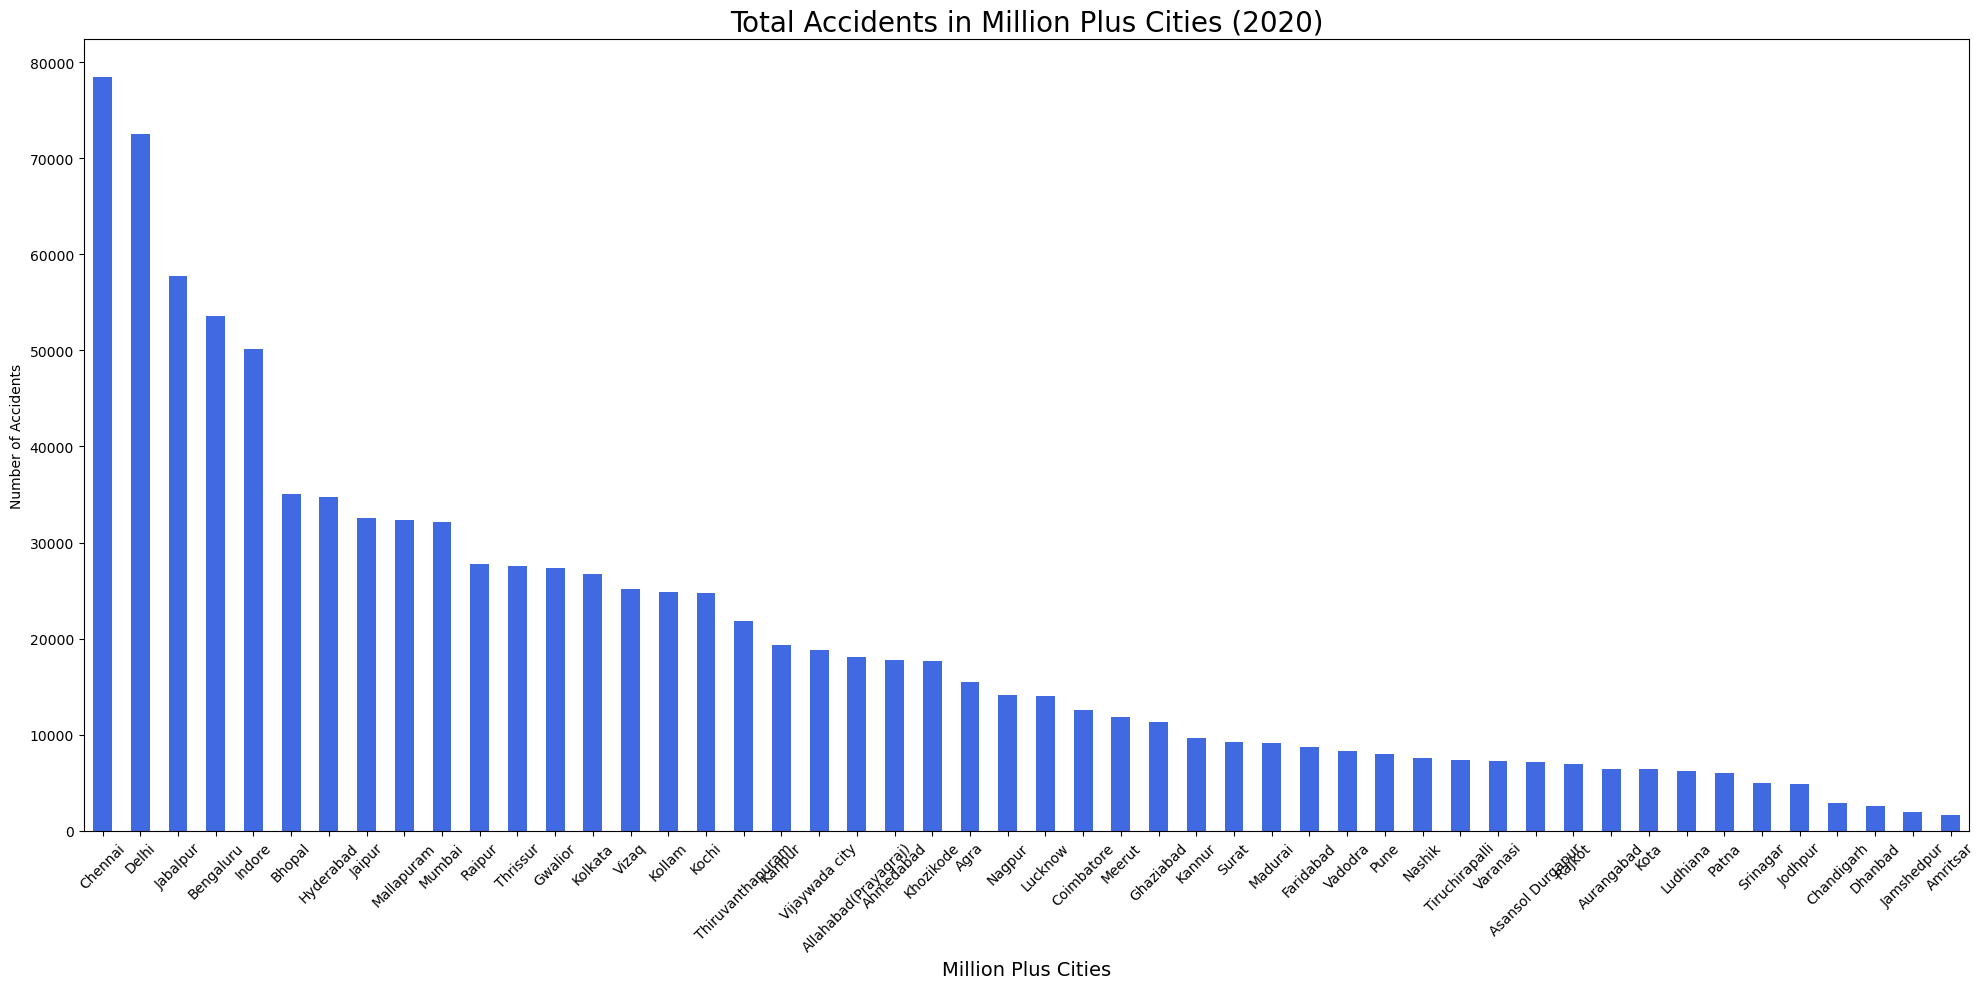

In [23]:
#  Total Accidents by City
plt.figure(figsize=(20,10))
city_counts = df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
city_counts.plot(kind='bar', color='royalblue')
plt.title('Total Accidents in Million Plus Cities (2020)', fontsize=20)
plt.ylabel('Number of Accidents')
plt.xlabel('Million Plus Cities',fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Prepare the data as a DataFrame
cause_counts = df.groupby('Cause category')['Count'].sum().sort_values(ascending=True).reset_index()


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_8400\762444245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cause_counts, x='Cause category', y='Count', palette='magma')


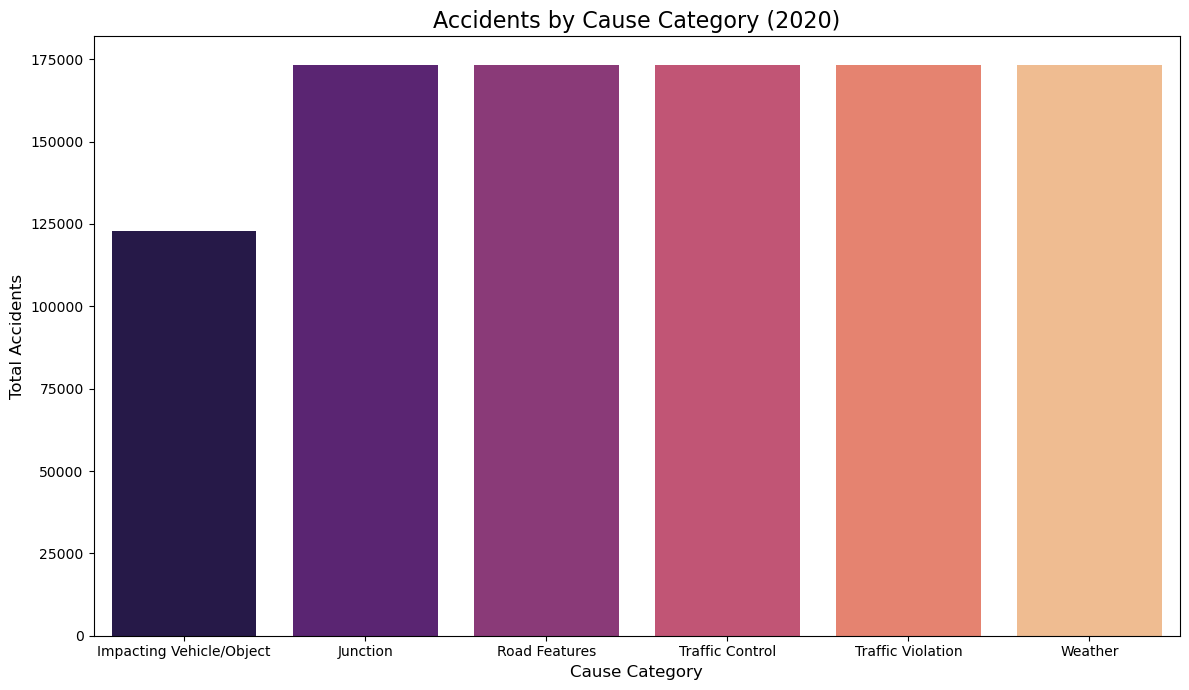

In [34]:
# Accidents by Cause Category
plt.figure(figsize=(12, 7))
sns.barplot(data=cause_counts, x='Cause category', y='Count', palette='magma')
plt.title('Accidents by Cause Category (2020)', fontsize=16)
plt.xlabel('Cause Category', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Prepare data as DataFrame
top_subcat = df.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False).head(10).reset_index()


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_8400\2073901060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_subcat, x='Cause Subcategory', y='Count', palette='viridis')


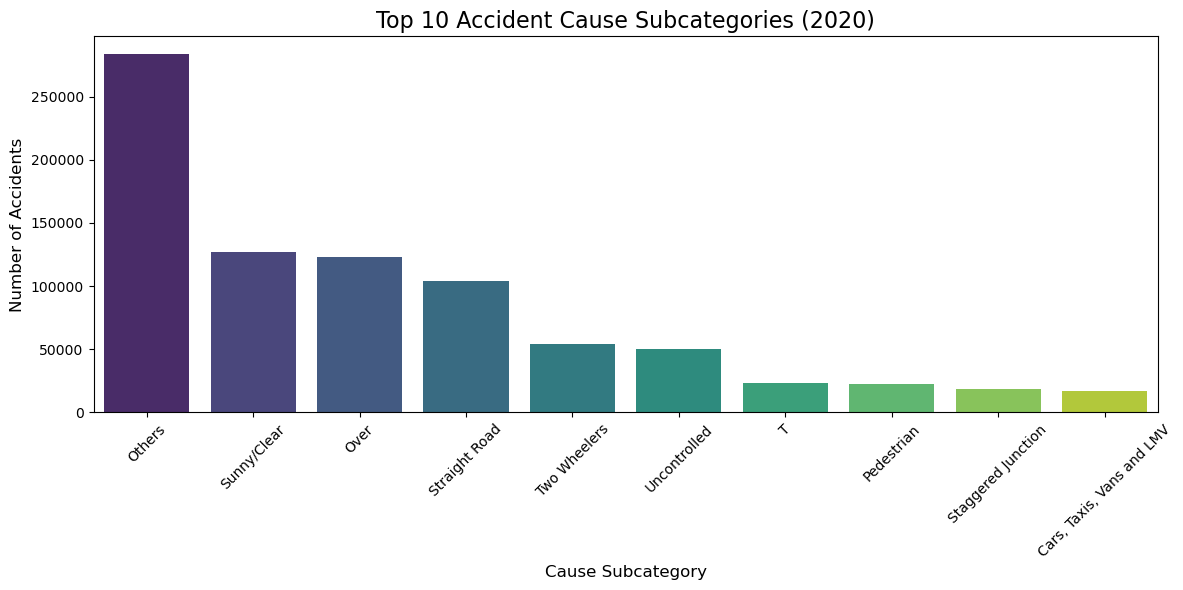

In [38]:
# Top 10 Cause Subcategories
plt.figure(figsize=(12, 6))
sns.barplot(data=top_subcat, x='Cause Subcategory', y='Count', palette='viridis')
plt.title('Top 10 Accident Cause Subcategories (2020)', fontsize=16)
plt.xlabel('Cause Subcategory', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

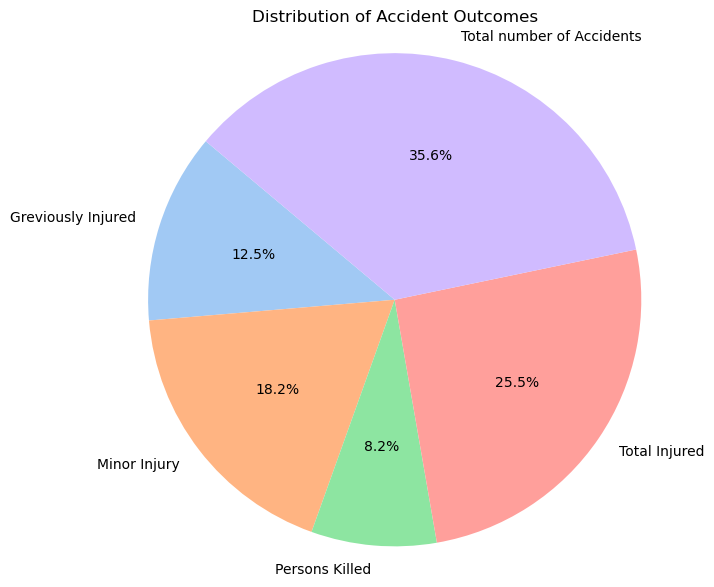

In [39]:
# Outcome Distribution
plt.figure(figsize=(7, 7))
outcome_counts = df.groupby('Outcome of Incident')['Count'].sum()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Accident Outcomes')
plt.axis('equal')
plt.show()

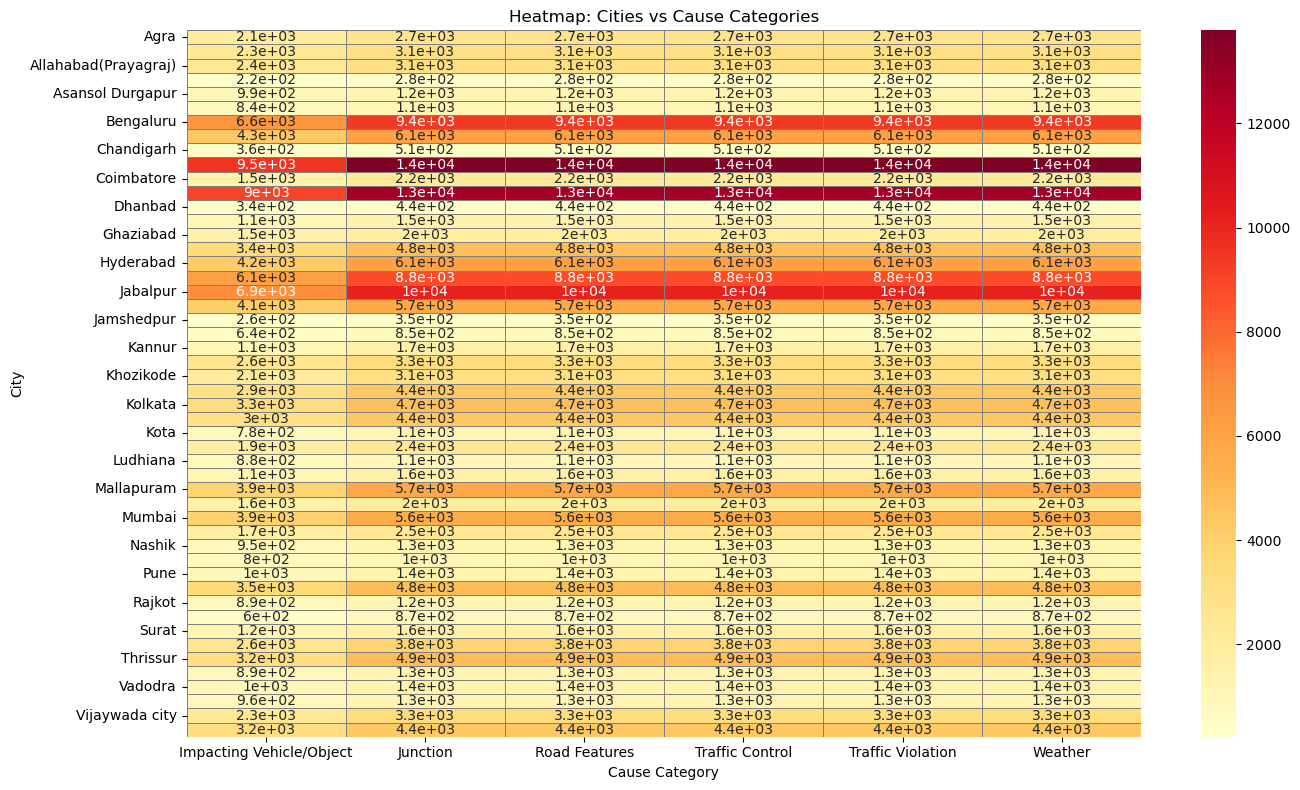

In [40]:
# Heatmap: Cities vs. Cause Categories
heatmap_data = df.pivot_table(index='Million Plus Cities', columns='Cause category', values='Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True)
plt.title('Heatmap: Cities vs Cause Categories')
plt.ylabel('City')
plt.xlabel('Cause Category')
plt.tight_layout()
plt.show()